In [24]:
import pickle
import pandas as pd
import numpy as np
import re
import langdetect
from enchant.checker import SpellChecker

# Data Prep

In [2]:
with open('posts2.pkl', 'rb') as fh:
    data = pickle.load(fh)
del data['block_nums']

In [3]:
post_df = pd.DataFrame(data)
post_df.head()

,body,created_at,post,reward,tags,title
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design"
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...
4,<center><a href='https://d.tube/#!/v/greyjay26...,2018-01-15 21:17:51,"(greyjay265, vq01dxzf)",0.028,"(dtube, dtube, bitcoin, cryptocurrency, altcoi...",LETS GET RICH. TOP 5 ALTCOINS MAY CHANGE YOUR ...


In [4]:
def filter_images_and_links(text):
    return re.sub('!?\[[-a-zA-Z0-9?@: %._\+~#=/()]*\]\([-a-zA-Z0-9?@:%._\+~#=/()]+\)', '', text)

filter_images_and_links('Lookat ![j kjds](wehwjrkjewrk.de), yes [iii](jlkajddjsla), and '
                        '![images (17).jpg](https://steemitimages.com/DQmQF5BxHtPdPu1yKipV67GpnRdzemPpEFCqB59kVXC6Ahy/images%20(17).jpg)')

'Lookat , yes , and '

In [5]:
def filter_html_tags(text):
    return re.sub('</?[a-z]{1,11}>', '', text)

filter_html_tags('<jkdjdksakd>hi</img>')

'hi'

In [6]:
def filter_urls(text):
    return re.sub('(https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]'
                   '[a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}|www\.'
                   '[a-zA-Z0-9][a-zA-Z0-9-]+[a-zA-Z0-9]\.[^\s]{2,}'
                   '|https?:\/\/(?:www\.|(?!www))[a-zA-Z0-9]\.[^\s]'
                   '{2,}|www\.[a-zA-Z0-9]\.[^\s]{2,})', '', text)

filter_urls('I like www.pipes.com')

'I like '

In [7]:
def filter_special_characters(text):
    return re.sub('[^A-Za-z0-9\s;,.?!]+', '', text)

filter_special_characters('Hi//)(&(/%( \n\n\t)))""""""!!!.')

'Hi \n\n\t!!!.'

In [8]:
def filter_formatting(text):
    text = re.sub('&?nbsp', ' ',text)
    text = re.sub('aligncenter', '', text)
    text = re.sub('styletextalign', '', text)
    return text

filter_formatting('Hi&nbsphey aligncenter nbsp styletextalign kk')

'Hi hey     kk'

In [9]:
def count_paragraphs(text):
    return text.count('\n\n') + 1

count_paragraphs('Hello \n\n World \n\n\n !')

3

In [10]:
def replace_newlines(text):
    return re.sub('\s+', ' ', text)

replace_newlines('Hi \n\n\tee')

'Hi ee'

In [11]:
print('Filtering images')
post_df['filtered_body'] = post_df.body.apply(lambda x: filter_images_and_links(x))
print('Filtering html')
post_df['filtered_body'] = post_df.filtered_body.apply(lambda x: filter_html_tags(x))
print('Filtering urls')
post_df['filtered_body'] = post_df.filtered_body.apply(lambda x: filter_urls(x))
print('Filtering formatting')
post_df['filtered_body'] = post_df.filtered_body.apply(lambda x: filter_formatting(x))
print('Filtering special characters')
post_df['filtered_body'] = post_df.filtered_body.apply(lambda x: filter_special_characters(x))
print('Counting paragraphs')
post_df['paragraphs'] = post_df.filtered_body.apply(lambda x: count_paragraphs(x))
print('Calculating length')
post_df['length'] = post_df.filtered_body.apply(lambda x: len(x))

post_df.head()

Filtering images
Filtering html
Filtering urls
Filtering formatting
Filtering special characters
Counting paragraphs
Calculating length


,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488
4,<center><a href='https://d.tube/#!/v/greyjay26...,2018-01-15 21:17:51,"(greyjay265, vq01dxzf)",0.028,"(dtube, dtube, bitcoin, cryptocurrency, altcoi...",LETS GET RICH. TOP 5 ALTCOINS MAY CHANGE YOUR ...,a href src\n\nJoin our Discord \n\nInstagram \...,10,292


In [12]:
large_post_df = post_df.loc[post_df.length >= 500, :]
print('Keeping {} large enough posts out of {}'.format(len(large_post_df), len(post_df)))

Keeping 28092 large enough posts out of 38103


In [13]:
def detect_language(text, max_length=1024):
    try:
        return langdetect.detect(text[:max_length])
    except Exception:
        return None
    
detect_language('die katze ist klein der hund auch')

'de'

In [14]:
print('Detecting language')
large_post_df.loc[:, 'language'] = large_post_df.filtered_body.apply(lambda x: detect_language(x))

Detecting language


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/pandas/core/indexing.py:357: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [15]:
en_df = large_post_df.loc[large_post_df.language == 'en', :]
print('Found {} English posts'.format(len(en_df)))

Found 22325 English posts


In [16]:
caps = "([A-Z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    "Taken from https://stackoverflow.com/questions/4576077/python-split-text-on-sentences"
    text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    if "Ph.D" in text: text = text.replace("Ph.D.","Ph<prd>D<prd>")
    text = re.sub("\s" + caps + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(caps + "[.]" + caps + "[.]" + caps + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(caps + "[.]" + caps + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + caps + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences
    
split_into_sentences('Hi my name is! Slim Shady! Really? Yeah.')

['Hi my name is!', 'Slim Shady!', 'Really?', 'Yeah.']

In [17]:
def compute_average_sentence_length(text_list):
    return np.mean([len(x) for x in text_list])

compute_average_sentence_length(['huhuh.', 'sbbbasdsads'])

8.5

In [18]:
def compute_sentence_length_variance(text_list):
    return np.var([len(x) for x in text_list])

compute_average_sentence_length(['huhuh.', 'sbbbasdsads', 'jj djdjd', '1'])

6.5

In [19]:
print('Splitting into sentences')
en_df['filtered_sentences'] = en_df.filtered_body.apply(lambda x: split_into_sentences(x))
print('Computing average sentence length')
en_df['average_sentence_length'] =  \
    en_df.filtered_sentences.apply(lambda x: compute_average_sentence_length(x))
print('Computing sentence length variance')
en_df['sentence_length_variance'] =  \
    en_df.filtered_sentences.apply(lambda x: compute_sentence_length_variance(x))

en_df.head()

Splitting into sentences


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)


Computing average sentence length


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/numpy/core/fromnumeric.py:3194: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)


Computing sentence length variance


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length,language,filtered_sentences,average_sentence_length,sentence_length_variance
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592,en,[For cooking we need Chocolate 200 gr Butter 5...,83.000000,5388.000000
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858,en,[Details Padlock is an open source androidios ...,58.000000,4187.333333
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452,en,[Last month I was part of the interview panel ...,47.522388,5803.995767
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488,en,"[Love oh love, sweet like wine made from fresh...",129.736842,5953.141274
5,When everyone was sealing Neo after the ICO b...,2018-01-15 21:15:09,"(modemser, neo-is-like-the-neo-in-matrix-man)",33.189,"(kr, kr, steemit, cryptocurrency, money, crypto)",Neo is like Neo in Matrix,When everyone was sealing Neo after the ICO b...,5,1408,en,[When everyone was sealing Neo after the ICO ...,80.176471,5791.910035


In [20]:
def combine_body_and_title(df):
    return df.title.apply(lambda x: x.lower()) +' ' + df.filtered_body.apply(lambda x: x.lower())

In [21]:
def filter_punctuation(text):
    return re.sub('[;,.?!]+', '', text)

filter_punctuation('hi. my. name. is yolo!;;k;')

'hi my name is yolok'

In [22]:
print('Combining Body and Title')
en_df['combined'] = combine_body_and_title(en_df)
print('Filtering special characters again')
en_df['combined'] = en_df.combined.apply(lambda x: filter_special_characters(x))
print('Filtering punctuation')
en_df['combined'] = en_df.combined.apply(lambda x: filter_punctuation(x))

print('Replacing new lines')
en_df['combined'] = en_df.combined.apply(lambda x: replace_newlines(x))

en_df.head()

Combining Body and Title


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Filtering special characters again


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


Filtering punctuation


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Replacing new lines


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length,language,filtered_sentences,average_sentence_length,sentence_length_variance,combined
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592,en,[For cooking we need Chocolate 200 gr Butter 5...,83.000000,5388.000000,dessert home bounty eating that is very tasty ...
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858,en,[Details Padlock is an open source androidios ...,58.000000,4187.333333,padlock mobile app new logo design details pad...
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452,en,[Last month I was part of the interview panel ...,47.522388,5803.995767,get a skill not qualifications last month i wa...
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488,en,"[Love oh love, sweet like wine made from fresh...",129.736842,5953.141274,getting overstory part 4 blind and disillusion...
5,When everyone was sealing Neo after the ICO b...,2018-01-15 21:15:09,"(modemser, neo-is-like-the-neo-in-matrix-man)",33.189,"(kr, kr, steemit, cryptocurrency, money, crypto)",Neo is like Neo in Matrix,When everyone was sealing Neo after the ICO b...,5,1408,en,[When everyone was sealing Neo after the ICO ...,80.176471,5791.910035,neo is like neo in matrix when everyone was se...


In [25]:
checker = SpellChecker('en_US')
def count_mistakes(text):
    checker.set_text(text)
    nerrors = len([x for x in checker])
    return nerrors

count_mistakes('hi hiw are you')

1

In [26]:
print('Spell checking')
en_df['spelling_errors'] = en_df.combined.apply(lambda x: count_mistakes(x))

Spell checking


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [27]:
print('Tokenization')
en_df['tokens'] = en_df.combined.apply(lambda x: x.split(' '))
en_df['num_words'] = en_df.tokens.apply(lambda x: len(x))

en_df.head()

Tokenization


/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/robert/anaconda3/envs/steemit/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length,language,filtered_sentences,average_sentence_length,sentence_length_variance,combined,spelling_errors,tokens,num_words
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592,en,[For cooking we need Chocolate 200 gr Butter 5...,83.000000,5388.000000,dessert home bounty eating that is very tasty ...,2,"[dessert, home, bounty, eating, that, is, very...",122
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858,en,[Details Padlock is an open source androidios ...,58.000000,4187.333333,padlock mobile app new logo design details pad...,13,"[padlock, mobile, app, new, logo, design, deta...",152
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452,en,[Last month I was part of the interview panel ...,47.522388,5803.995767,get a skill not qualifications last month i wa...,60,"[get, a, skill, not, qualifications, last, mon...",1154
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488,en,"[Love oh love, sweet like wine made from fresh...",129.736842,5953.141274,getting overstory part 4 blind and disillusion...,13,"[getting, overstory, part, 4, blind, and, disi...",488
5,When everyone was sealing Neo after the ICO b...,2018-01-15 21:15:09,"(modemser, neo-is-like-the-neo-in-matrix-man)",33.189,"(kr, kr, steemit, cryptocurrency, money, crypto)",Neo is like Neo in Matrix,When everyone was sealing Neo after the ICO b...,5,1408,en,[When everyone was sealing Neo after the ICO ...,80.176471,5791.910035,neo is like neo in matrix when everyone was se...,83,"[neo, is, like, neo, in, matrix, when, everyon...",219


In [28]:
final_df = en_df.dropna()

print('Final data set has {} entries'.format(len(final_df)))
final_df.head()

Final data set has 22192 entries


,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length,language,filtered_sentences,average_sentence_length,sentence_length_variance,combined,spelling_errors,tokens,num_words
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592,en,[For cooking we need Chocolate 200 gr Butter 5...,83.000000,5388.000000,dessert home bounty eating that is very tasty ...,2,"[dessert, home, bounty, eating, that, is, very...",122
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858,en,[Details Padlock is an open source androidios ...,58.000000,4187.333333,padlock mobile app new logo design details pad...,13,"[padlock, mobile, app, new, logo, design, deta...",152
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452,en,[Last month I was part of the interview panel ...,47.522388,5803.995767,get a skill not qualifications last month i wa...,60,"[get, a, skill, not, qualifications, last, mon...",1154
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488,en,"[Love oh love, sweet like wine made from fresh...",129.736842,5953.141274,getting overstory part 4 blind and disillusion...,13,"[getting, overstory, part, 4, blind, and, disi...",488
5,When everyone was sealing Neo after the ICO b...,2018-01-15 21:15:09,"(modemser, neo-is-like-the-neo-in-matrix-man)",33.189,"(kr, kr, steemit, cryptocurrency, money, crypto)",Neo is like Neo in Matrix,When everyone was sealing Neo after the ICO b...,5,1408,en,[When everyone was sealing Neo after the ICO ...,80.176471,5791.910035,neo is like neo in matrix when everyone was se...,83,"[neo, is, like, neo, in, matrix, when, everyon...",219


# Machine Learning

In [29]:
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from gensim.matutils import corpus2dense
from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import GridSearchCV

In [30]:
np.random.seed(1)
train_mask = np.random.rand(len(final_df)) < 0.8
test_mask = ~train_mask
train_df = final_df.loc[train_mask]
test_df = final_df.loc[test_mask]
train_df.head()

,body,created_at,post,reward,tags,title,filtered_body,paragraphs,length,language,filtered_sentences,average_sentence_length,sentence_length_variance,combined,spelling_errors,tokens,num_words
0,![image](https://img.esteem.ws/wsuuxa7xk4.jpg)...,2018-01-15 21:17:42,"(yatsuk.kostia, dessert-home-bounty-eating-tha...",2.684,"(food, food, recipe, photo, art, blog)",Dessert: home bounty. Eating that is very tasty!,\n\nFor cooking we need\nChocolate 200 gr\nBut...,4,592,en,[For cooking we need Chocolate 200 gr Butter 5...,83.000000,5388.000000,dessert home bounty eating that is very tasty ...,2,"[dessert, home, bounty, eating, that, is, very...",122
1,#### Details\nPadlock is an open source androi...,2018-01-15 21:03:30,"(mutluhan, padlock-mobile-app-new-logo-design)",24.291,"(utopian-io, utopian-io, graphics, design, log...","Padlock, Mobile App New Logo Design",Details\nPadlock is an open source androidios...,22,858,en,[Details Padlock is an open source androidios ...,58.000000,4187.333333,padlock mobile app new logo design details pad...,13,"[padlock, mobile, app, new, logo, design, deta...",152
2,![31050144-interior-of-busy-architect-s-office...,2018-01-15 21:17:42,"(ankunda, get-a-skill-not-qualifications)",0.000,"(get, get, a, skill, not, qualifications)","""Get a Skill not Qualifications """,\nLast month I was part of the interview panel...,13,6452,en,[Last month I was part of the interview panel ...,47.522388,5803.995767,get a skill not qualifications last month i wa...,60,"[get, a, skill, not, qualifications, last, mon...",1154
3,![images (17).jpg](https://steemitimages.com/D...,2018-01-15 21:17:51,"(belemo, getting-over-story-part-4-blind-and-d...",0.000,"(stach, stach, story, love, writing, blog)",Getting Over(Story) Part 4: Blind and Disillus...,"\nLove oh love, sweet like wine made from fres...",5,2488,en,"[Love oh love, sweet like wine made from fresh...",129.736842,5953.141274,getting overstory part 4 blind and disillusion...,13,"[getting, overstory, part, 4, blind, and, disi...",488
5,When everyone was sealing Neo after the ICO b...,2018-01-15 21:15:09,"(modemser, neo-is-like-the-neo-in-matrix-man)",33.189,"(kr, kr, steemit, cryptocurrency, money, crypto)",Neo is like Neo in Matrix,When everyone was sealing Neo after the ICO b...,5,1408,en,[When everyone was sealing Neo after the ICO ...,80.176471,5791.910035,neo is like neo in matrix when everyone was se...,83,"[neo, is, like, neo, in, matrix, when, everyon...",219


In [31]:
train_tokens = train_df.tokens
test_tokens = test_df.tokens

In [32]:
dictionary = corpora.Dictionary(train_tokens)
print('Filtering extremes of dict with length {}'.format(len(dictionary)))
dictionary.filter_extremes(no_below=5, no_above=0.33)
print('New size of dictionary {}'.format(len(dictionary)))
train_corpus = [dictionary.doc2bow(text) for text in train_tokens]
test_corpus = [dictionary.doc2bow(text) for text in test_tokens]

Filtering extremes of dict with length 186501
New size of dictionary 34707


In [33]:
NUM_TOPICS = 64
lsi = LsiModel(train_corpus, num_topics=NUM_TOPICS)

In [34]:
train_projection = lsi[train_corpus]
test_projection = lsi[test_corpus]

In [35]:
def combine_X_data(lsiprojection, body_length, paragraphs, num_words, spelling_mistakes, 
                  average_sentence_length, sentence_length_variance):
    ntopics = len(lsiprojection[1])
    X = np.zeros((len(body_length), ntopics + 9))
    X[:, 0:ntopics]  = corpus2dense(lsiprojection, len(lsiprojection[1])).T
    X[:, -1] = body_length
    X[:, -2] = paragraphs
    X[:, -3] = num_words
    X[:, -4] = spelling_mistakes
    X[:, -5] = body_length / num_words
    X[:, -6] = num_words / paragraphs
    X[:, -7] = spelling_mistakes / num_words
    X[:, -8] = average_sentence_length
    X[:, -9] = sentence_length_variance
    return X

In [36]:
X = combine_X_data(train_projection, train_df.length, 
                   train_df.paragraphs, train_df.num_words, train_df.spelling_errors,
                  train_df.average_sentence_length, train_df.sentence_length_variance)
y = train_df.reward.values.astype(float)
X,y

(array([[ 6.97414204e-02,  1.30177927e+00, -1.78861916e-02, ...,
          1.22000000e+02,  4.00000000e+00,  5.92000000e+02],
        [ 7.83140734e-02,  2.38206244e+00,  1.14062622e-01, ...,
          1.52000000e+02,  2.20000000e+01,  8.58000000e+02],
        [ 1.24492574e+00,  2.11573277e+01, -1.23064828e+00, ...,
          1.15400000e+03,  1.30000000e+01,  6.45200000e+03],
        ...,
        [ 1.33494577e+01,  1.48393875e+02, -7.25253296e+00, ...,
          9.67200000e+03,  9.00000000e+00,  5.67710000e+04],
        [ 5.31491525e-02,  1.58054674e+00,  6.82214415e-03, ...,
          1.02000000e+02,  1.10000000e+01,  5.73000000e+02],
        [ 1.09348953e-01,  3.14529228e+00,  2.08977535e-02, ...,
          3.89000000e+02,  2.60000000e+01,  2.49500000e+03]]),
 array([ 2.684, 24.291,  0.   , ...,  0.032,  0.12 , 22.22 ]))

In [37]:
X_test = combine_X_data(test_projection, test_df.length, test_df.paragraphs,
                       test_df.num_words, test_df.spelling_errors,
                       test_df.average_sentence_length, test_df.sentence_length_variance)
y_test = test_df.reward.values.astype(float)
X_test,y_test

(array([[ 4.93361622e-01,  7.43215942e+00, -1.48210287e-01, ...,
          5.10000000e+02,  3.00000000e+00,  2.58400000e+03],
        [ 1.08554268e+00,  3.41105556e+00,  3.97620916e-01, ...,
          3.08000000e+02,  3.00000000e+00,  1.79000000e+03],
        [ 3.43912220e+00,  4.07009220e+00,  1.95611775e-01, ...,
          3.21000000e+02,  1.70000000e+01,  1.77900000e+03],
        ...,
        [ 1.12424481e+00,  6.72990131e+00,  2.22253539e-02, ...,
          5.48000000e+02,  1.50000000e+01,  3.47700000e+03],
        [ 4.23664236e+00,  5.88735542e+01, -5.49103451e+00, ...,
          1.88500000e+03,  4.80000000e+01,  1.01830000e+04],
        [ 1.40942442e+00,  2.45862603e+00, -1.11092255e-01, ...,
          1.55000000e+02,  2.00000000e+00,  8.20000000e+02]]),
 array([2.88900e+00, 6.72000e-01, 2.14800e+00, ..., 0.00000e+00,
        5.70322e+02, 5.44000e-01]))

In [38]:
model = RandomForestRegressor(n_estimators=128, max_leaf_nodes=10000, 
                              max_features=0.3, n_jobs=-1, verbose=1,
                              random_state=42)

In [39]:
model = model.fit(X,y)

[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 128 out of 128 | elapsed:   33.2s finished


In [40]:
model.score(X, y)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.2s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    0.4s finished


0.9084312048009144

In [41]:
y_hat = model.predict(X)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    0.3s finished


In [42]:
model.score(X_test, y_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    0.2s finished


0.3040508845559037

In [43]:
y_hat_test = model.predict(X_test)

[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.1s
[Parallel(n_jobs=4)]: Done 128 out of 128 | elapsed:    0.2s finished


# Data Analysis

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5,1,'Training Set')

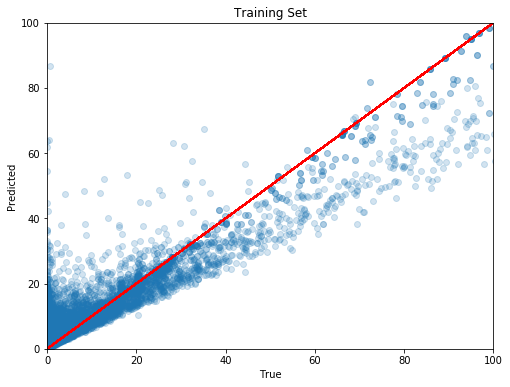

In [45]:
plt.figure(figsize=(8,6))
plt.scatter(y, y_hat, alpha=0.2)
plt.plot(y,y, lw=1.5, c='r')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Training Set')

Text(0.5,1,'Test Set')

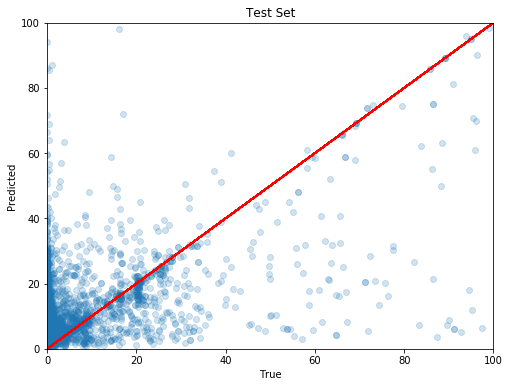

In [46]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_hat_test, alpha=0.2)
plt.plot(y_test,y_test, lw=1.5, c='r')
plt.xlim(0,100)
plt.ylim(0,100)
plt.xlabel('True')
plt.ylabel('Predicted')
plt.title('Test Set')

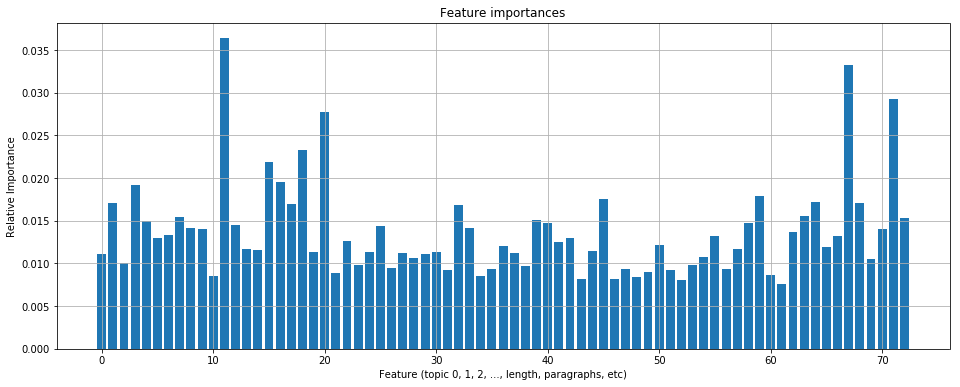

In [47]:
plt.figure(figsize=(16,6))
importances = model.feature_importances_
ximp = list(range(len(importances)))
plt.bar(ximp, importances)
plt.xlabel('Feature (topic 0, 1, 2, ..., length, paragraphs, etc)')
plt.ylabel('Relative Importance')
plt.title('Feature importances')
plt.grid()

In [48]:
for topic in range(lsi.num_topics):
    best_words = lsi.show_topic(topic, 7)
    inwords = [(dictionary[int(x[0])], x[1]) for x in best_words]
    wordstring = ', '.join('{}: {:0.2f}'.format(*x) for x in inwords)
    print('Topic {}: {}'.format(topic, wordstring))

Topic 0: post: 0.34, no: 0.34, latest: 0.33, sp: 0.33, flag: 0.33, hits: 0.33, vp: 0.33
Topic 1: he: 0.24, her: 0.22, she: 0.18, his: 0.17, href: 0.15, their: 0.14, had: 0.14
Topic 2: pm: 0.67, filipino: 0.56, ng: 0.29, ay: 0.20, ang: 0.18, na: 0.15, sa: 0.14
Topic 3: href: -0.52, her: 0.26, img: -0.24, she: 0.22, he: 0.21, source: -0.20, targetblank: -0.18
Topic 4: sbd: 0.69, votes: 0.31, reward: 0.29, 0000: 0.28, 00: 0.22, href: -0.19, steem: 0.11
Topic 5: 00: 0.96, sbd: -0.16, 001: 0.09, votes: -0.08, reward: -0.07, 0000: -0.07, 002: 0.04
Topic 6: market: -0.51, global: -0.26, her: 0.21, sbd: 0.20, report: -0.19, href: 0.19, she: 0.17
Topic 7: breast: 0.35, market: -0.35, her: -0.32, cancer: 0.30, she: -0.26, global: -0.19, he: -0.17
Topic 8: breast: -0.52, cancer: -0.45, her: -0.17, risk: -0.16, she: -0.16, mission: 0.14, game: 0.14
Topic 9: 1944: 0.28, code: 0.25, letter: 0.25, joined: 0.25, mark: 0.24, 1945: 0.23, lf: 0.22
Topic 10: mission: -0.40, game: -0.32, zombies: -0.25, gu

# Truffles

In [49]:
money_filter = (0.1 < y_test) & (y_test < 10.)

In [56]:
def find_k_worst(y, y_hat, k=25):
    return np.argsort(y - y_hat)[:k]

In [57]:
kworst = find_k_worst(y_test[money_filter], y_hat_test[money_filter])
kworst

array([ 240,  255, 1044,  934, 1517, 1325, 1393, 1036,   26, 1372,    7,
       1527, 1550, 1141, 1677,  991,   10, 1255, 1636,    2,  410,  599,
        396,  366, 1733])

In [58]:
tmp = test_df.reset_index()
for k in kworst:
    print('\n\n\n------- {} -----'.format(test_df.loc[money_filter].title.iloc[k]))
    print('https://steemit.com/@{}/{}'.format(*test_df.loc[money_filter].iloc[k].post))
    print('Estimated: {} Reward: {}'.format(y_hat_test[money_filter][k], y_test[money_filter][k]))
    print('\n###############################################################################################\n')
    print(test_df[money_filter].iloc[k].body[:1500])
    print('\n###############################################################################################\n')
    




------- In Defense of Aziz Ansari -----
https://steemit.com/@trending/in-defense-of-aziz-ansari
Estimated: 86.91557031249997 Reward: 1.067

###############################################################################################

<center><h1>Is #MeToo Missing The Mark?</h1></center>

<a href="https://babe.net/2018/01/13/aziz-ansari-28355">I read an article over the weekend on "Babe.net"</a> (oh, boy - red flag #1) of an account that directly accused Aziz Ansari of giving a woman the "worst night of her life," while also subtly accusing him of "sexual assault." Although some of what I read could certainly be considered "creepy," absolutely none of it could feasibly be considered "assault."

<center>![](https://steemitimages.com/DQmSTYqqGU8JrMSp6FoKtxmAdaTtcJQdvfhvN9cN3ogvdys/image.png)</center>

Let me preface this article with the fact that I don't know Aziz (obviously), found him irritating in his role on the NBC show <i>Parks and Recreation</i>, and don't really care much f

In [55]:
!pip freeze

appdirs==1.4.3
bleach==2.1.2
boto==2.48.0
boto3==1.5.20
botocore==1.8.34
bz2file==0.98
cachetools==2.0.1
certifi==2017.7.27.1
chardet==3.0.4
cycler==0.10.0
cymem==1.31.2
cytoolz==0.8.2
dateparser==0.6.0
decorator==4.1.2
diff-match-patch==20121119
dill==0.2.7.1
docutils==0.14
ecdsa==0.13
en-core-web-sm==2.0.0
entrypoints==0.2.3
ftfy==4.4.3
funcy==1.9.1
gensim==3.2.0
html5lib==1.0.1
humanize==0.5.1
idna==2.6
ijson==2.3
ipykernel==4.7.0
ipython==6.2.1
ipython-genutils==0.2.0
ipywidgets==7.1.0
jedi==0.11.1
Jinja2==2.10
jmespath==0.9.3
jsonschema==2.6.0
jupyter-client==5.2.1
jupyter-console==5.2.0
jupyter-core==4.4.0
langdetect==1.0.7
language-tool==0.3
MarkupSafe==1.0
matplotlib==2.1.2
maya==0.3.3
mistune==0.8.3
msgpack-numpy==0.4.1
msgpack-python==0.5.1
murmurhash==0.28.0
nbconvert==5.3.1
nbformat==4.4.0
networkx==2.0
notebook==5.2.2
numpy==1.14.0
pandas==0.22.0
pandocfilters==1.4.2
parso==0.1.1
pathlib==1.0.1
pendulum==1.3.0
pexpect==4.3.1
pickleshare==0.7.4
pipfile==0.0.2
plac==0.9.6
pr